<a href="https://colab.research.google.com/github/Sonu2252/Computer_Vision/blob/main/MNIST_CNN_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras import backend as K

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import unique, argmax

In [22]:
(X_train, y_train), (X_test, y_test) = load_data()

In [23]:
X_train.shape

(60000, 28, 28)

In [24]:
X_test.shape

(10000, 28, 28)

In [25]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [26]:
X_train.shape

(60000, 28, 28, 1)

In [27]:
X_test.shape

(10000, 28, 28, 1)

**Normalize inputs from 0-255 to 0-1.**

In [28]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

In [29]:
X_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

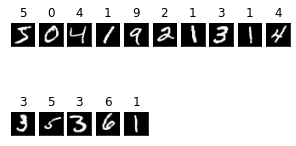

In [34]:
fig = plt.figure(figsize=(5, 3))
for i in range(15):
  ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(X_train[i]), cmap='gray')
  ax.set_title(y_train[i])

In [35]:
img_shape = X_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [37]:
model = Sequential([
            Conv2D(32, (3, 3), activation="relu", input_shape = img_shape),
            MaxPool2D((2, 2)),
            Conv2D(48, (3, 3), activation="relu"),
            MaxPool2D((2, 2)),
            Dropout(0.5),
            Flatten(),
            Dense(500, activation="relu"),
            Dense(10, activation="softmax")
])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

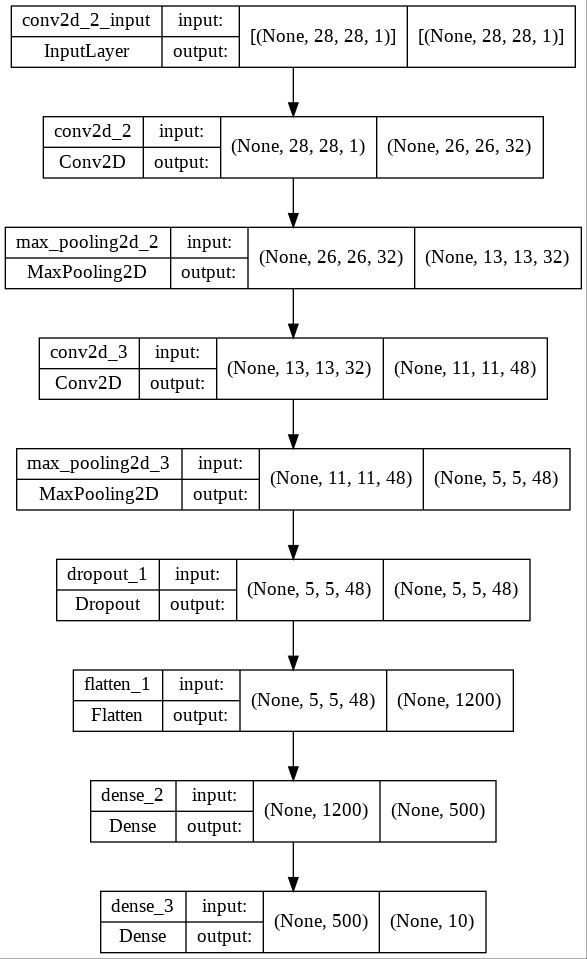

In [39]:
plot_model(model, 'model.jpg', show_shapes=True)

In [42]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 43s 99ms/step - loss: 0.2471 - accuracy: 0.9251 - val_loss: 0.0534 - val_accuracy: 0.9827
Epoch 2/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0840 - accuracy: 0.9740 - val_loss: 0.0449 - val_accuracy: 0.9873
Epoch 3/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0596 - accuracy: 0.9814 - val_loss: 0.0421 - val_accuracy: 0.9888
Epoch 4/10
422/422 [==============================] - 44s 104ms/step - loss: 0.0490 - accuracy: 0.9844 - val_loss: 0.0308 - val_accuracy: 0.9922
Epoch 5/10
422/422 [==============================] - 53s 126ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0311 - val_accuracy: 0.9898
Epoch 6/10
422/422 [==============================] - 41s 98ms/step - loss: 0.0363 - accuracy: 0.9881 - val_loss: 0.0264 - val_accuracy: 0.9927
Epoch 7/10
422/422 [==============================] - 47s 111ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0263 - val_accur

In [44]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0219 - accuracy: 0.9925


In [45]:
print(f"Accuracy: {accuracy*100}")

Accuracy: 99.25000071525574


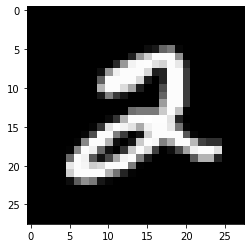

In [46]:
image = X_train[5]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [47]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

In [50]:
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 2
